## Data Fetch
https://archive.ics.uci.edu/dataset/2/adult

In [31]:
from ucimlrepo import fetch_ucirepo  # pip install ucimlrepo
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Alternativa de lectura de archivo
archivo = "adult.data"
columnas = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

df = pd.read_csv(archivo, names=columnas, sep=",", skipinitialspace=True)

print(df.head())


   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [4]:
adult = fetch_ucirepo(id=2)
# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

In [5]:
print(X.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object


In [15]:
df = pd.concat([X, y], axis=1)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [17]:
# Duplicados
duplicados = df.duplicated().sum()
print(f"Número de duplicados: {duplicados}")

df = df.drop_duplicates()

Número de duplicados: 29


In [20]:
# Nulos
print(df.isnull().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [25]:
# Valores únicos
valores_unicos = pd.DataFrame({
    "Columna": df.columns,
    "Valores únicos": [df[col].nunique() for col in df.columns]
})

print(valores_unicos)

for col in df.columns:
    print(f"\n Columna: {col}")
    print(df[col].unique())


           Columna  Valores únicos
0              age              74
1        workclass               9
2           fnlwgt           28523
3        education              16
4    education-num              16
5   marital-status               7
6       occupation              15
7     relationship               6
8             race               5
9              sex               2
10    capital-gain             123
11    capital-loss              99
12  hours-per-week              96
13  native-country              42
14          income               4

 Columna: age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

 Columna: workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

 Columna: fnlwgt
[ 77516  83311 215646 ... 173449  896

In [27]:
# Reemplazar ? y NaN por "Non-specific"
columnas_a_cambiar = ['workclass', 'occupation', 'native-country']

for col in columnas_a_cambiar:
    df[col] = df[col].replace('?', 'Non-specific')
    df[col] = df[col].fillna('Non-specific')


## Análisis de variables

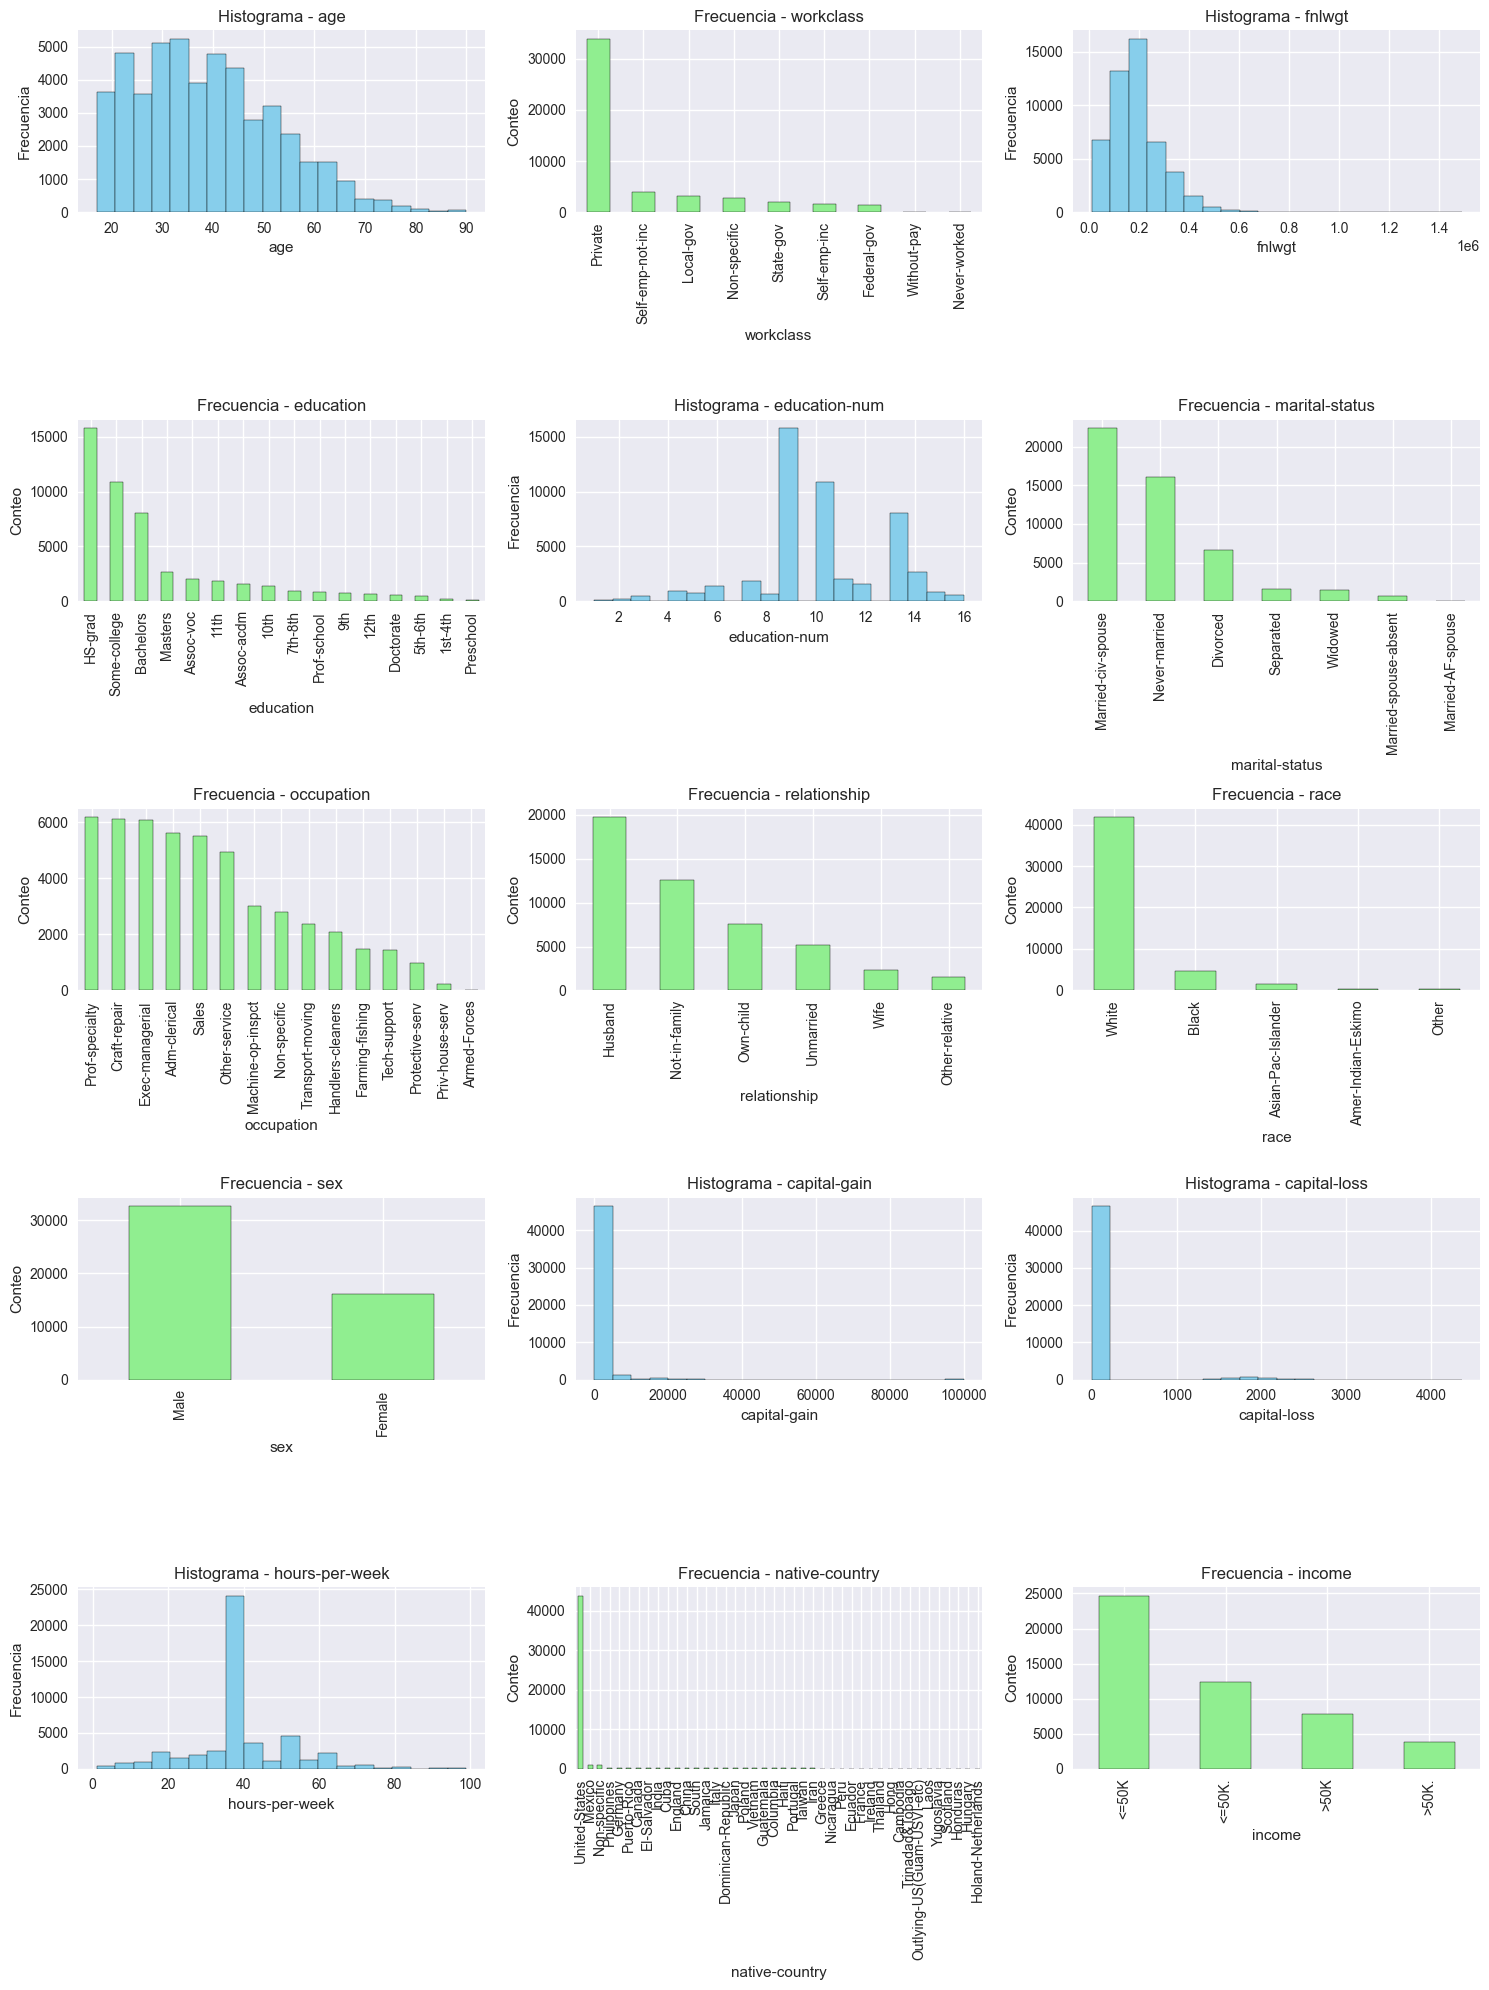

In [32]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15, 20))


for i, col in enumerate(df.columns, 1):
    plt.subplot(5, 3, i) 
    
    if df[col].dtype in ['int64', 'float64']:  # numéricas
        plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histograma - {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
    
    else:  # categóricas
        df[col].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
        plt.title(f'Frecuencia - {col}')
        plt.xlabel(col)
        plt.ylabel('Conteo')

plt.tight_layout()
plt.show()
